In [28]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


First we'll generate a random matrix

In [5]:
#Number of columns (features)
K = 5

#Number of records
N = 1000

#Generate an NxK matrix of uniform random variables
X = np.random.random([N, K])

Let's peak at our data to confirm it looks as we expect it

In [7]:
X[100, :]

array([ 0.88269874,  0.79991471,  0.21936384,  0.21760988,  0.24162985])

In [8]:
X.shape

(1000, 5)

This exercise is about designing a scoring function for a logistic regression. As we are not concerned with fitting a model to data, we can just make up a logistic regression. <br> <br>

For quick intro, the Logistic Regression takes the form of $\hat{Y} = f(x * \beta^T)$, where $x$ is the $1xK$ vector of features and $\beta$ is the $1xK$ vector of weights. The function $f$, called a 'link' function, is the inverse logit: <br><br>

<center>$f(a)=\frac{1}{1+e^{-a}}$</center> <br><br>

In this notebook we'll write a function that, given inputs of $X$ and $\beta$, returns a value for $\hat{Y}$.
<br><br>
First let's generate a random set of weights to represent $\beta$.


In [10]:
beta = 2 * (np.random.random(K) - 0.5)
beta

array([-0.57366105,  0.30701395, -0.90111119, -0.21073918, -0.81685711])

Notice how we applied a neat NumPy trick here. The numpy.random.random() function returns an array, yet we applied what appears to be a scalar operation on the vector. This is an example of what NumPy calls vectorization (a major point of this tutorial), which offers us both a very fast way to do run vector computations as well as a clean and concise method of coding. 

<br><br>

<b>Question: we designed the above $beta$ vector such that $E[\beta_i]=0$. How can we confirm that we did this correctly?</b>

In [11]:
#start by taking the mean of the beta we already calculated
beta.mean()

-0.43907091639474505

In [30]:
#It is likely the above is not equal to zero. Let's simulate this 100k times and see what the average mean is

means = []
for i in range(100000):
    means.append(2 * (np.random.random(K) - 0.5).mean())
    

Now let's use matplotlibs hist function to plot the histogram of means here. 

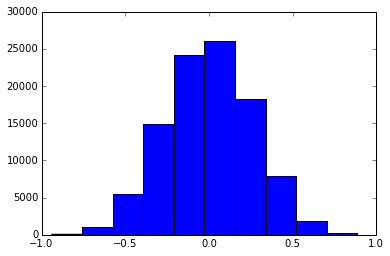

In [31]:
plt.hist(means)
plt.show()

We should expect the distribution to be centered around zero. Is it?

Now let's write our scoring function. Let's try to use as much of Numpy's inner optimization as possible (hint, this can be done in two lines and without writing any loops).

In [45]:
def score_logistic_regression(X, beta):
    '''
    This function takes in an NxK matrix X and 1xK vector beta.
    The function should apply the logistic scoring function to each record of X.
    The output should be an Nx1 vector of scores
    '''
    
    #First let's calculate X*beta - make sure to use numpy's 'dot' method
    xbeta = X.dot(beta)
    
    #Now let's input this into the link function
    prob_score = 1 / (1 + np.exp(-1 * xbeta))
    
    return prob_score

So how much faster is it by using Numpy? We can test this be writing the same function that uses no Numpy and executes via loops.

In [44]:
def score_logistic_regression_NoNumpy(X, beta):
    '''
    This function takes in an NxK matrix X and 1xK vector beta.
    The function should apply the logistic scoring function to each record of X.
    The output should be an Nx1 vector of scores
    '''
    #Let's calculate xbeta using loops
    xbeta = []
    for row in X:
        
        xb = 0
        for i, el in enumerate(row):
            xb += el * beta[i]
        
        xbeta.append(xb)
        
    #Now let's apply the link function to each xbeta
    prob_score = []
    for xb in xbeta:
        prob_score.append(1 / (1 + np.exp(-1 * xb)))
        
    return prob_score

Before doing any analysis, let's test the output of each to make sure they equal

In [47]:
diff = np.abs(score_logistic_regression_NoNumpy(X, beta) - score_logistic_regression(X, beta))
np.round(diff.sum(), 8)

0.0

If they equal then we can proceed with timing analysis

In [48]:
%timeit score_logistic_regression_NoNumpy(X, beta)

100 loops, best of 3: 4.14 ms per loop


In [49]:
%timeit score_logistic_regression(X, beta)

The slowest run took 10.32 times longer than the fastest. This could mean that an intermediate result is being cached 
10000 loops, best of 3: 20.5 µs per loop


For more information about vectorization, check out the following links: